# ICA Algorithm

In [1]:
import pandas as pd
import numpy as np
from scipy import linalg as LA
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("data2.csv")
df=df.drop(['Unnamed: 0'],axis=1)
df.columns = [0,1,2]
df

,0,1,2
0,-0.744863,-0.914015,-1.815700
1,0.039325,1.064930,-1.587150
2,-0.407660,0.397869,-1.909981
3,0.033789,0.967298,-1.014872
4,-0.179156,0.695176,-1.491172
...,...,...,...
1995,0.398439,-0.292394,1.984417
1996,0.990135,0.141825,2.818675
1997,0.238568,-0.284869,1.386192
1998,-0.006532,-0.993170,1.481348


# Independent components must have zero correlation between each other.
# so We Centered data


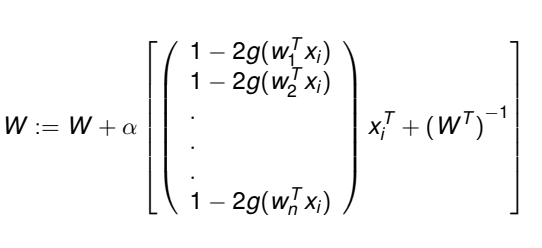

In [3]:
def Logistic(X):
    return (1/(1 + np.exp(-X))) 

In [4]:
def Centered(X):
    df=pd.DataFrame(X)
    df=(df-df.mean())/df.std()
    return np.array(df) 

In [6]:
def train(X,iteration,batch,alpha): 
    r,c= X.shape
    #Initialization 
    W = np.random.rand(c, c)
    #normalising 
    W =  W / np.sqrt((W ** 2).sum())       
    for i in range(iteration):
        #X =  np.take(X, np.random.permutation(r) ,axis=0)
        idx = np.random.randint(0,r-1,batch)
        X1  = X[idx]
        for j in X1:
            W = W + alpha*(np.dot( 1 - (2 * Logistic(np.dot(W,j.T))),j) + LA.inv(W).T)                                        
            W = W / np.sqrt((W ** 2).sum())
        if (W @ W.T)<
    S = np.dot(X,W)        
    S = Centered(S)
    
    return S ,W   
           

In [7]:
X  = Centered(df)
S,W  = train(X,1000,500,1)

In [8]:
W

array([[0.39634988, 0.3062674 , 0.28712434],
       [0.3062674 , 0.28712434, 0.39634988],
       [0.28712434, 0.39634988, 0.3062674 ]])

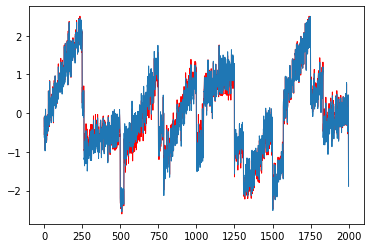

In [10]:
time=[i for i in range(2000)]
plt.plot(time,X[:,0],linewidth=1,color='r')
plt.plot(time,S[:,0],linewidth=1)

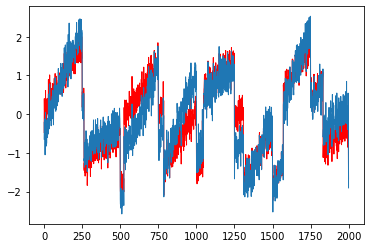

In [11]:
plt.plot(time,X[:,1],linewidth=1,color='r')
plt.plot(time,S[:,1],linewidth=1)

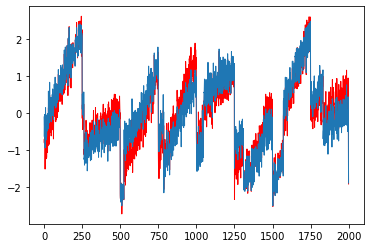

In [14]:
plt.plot(time,X[:,2],linewidth=1,color='r')
plt.plot(time,S[:,2],linewidth=1)

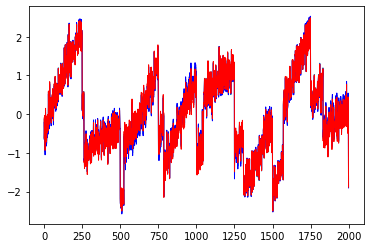

In [16]:
plt.plot(time,S[:,0],linewidth=1)
plt.plot(time,S[:,1],linewidth=1,color='b')
plt.plot(time,S[:,2],linewidth=1,color='r')

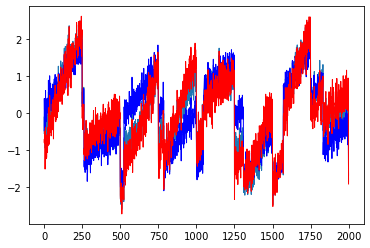

In [17]:
plt.plot(time,X[:,0],linewidth=1)
plt.plot(time,X[:,1],linewidth=1,color='b')
plt.plot(time,X[:,2],linewidth=1,color='r')